In [69]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats
import seaborn as sns
from scipy.stats import chi2_contingency
from scipy.stats import mannwhitneyu

In [ ]:
# Load cleaned data

cleaned_data = pd.read_csv('../cleaning/cleaned.csv')

## Data tidying for processing
NOTE: run all

In [21]:
cleaned_data.columns = cleaned_data.columns.str.strip().str.lower().str.replace(' ', '_').str.replace('(', '').str.replace(')', '')

renamed = {'majors': 'major',
 'minors_n/a_if_none': 'minor',
 'length_of_your_longest_relationship_has_to_be_an_number_of_months': 'longest_relationship',
 'number_of_romantic_involvements_n/a_if_not_applicable': 'num_relationships',
 'how_many_times_a_week_do_you_go_out?_e.g.,_going_to_a_party,_going_to_the_mall,_hanging_out_with_friends,_etc.': 'outings_per_week',
 'job_status_employed': 'job_employed',
 'job_status_part-time': 'job_part_time',
 'job_status_unemployed': 'job_unemployed',
 'sexuality_heterosexual/straight': 'sexuality_straight',
 'sexuality_homosexual/gay': 'sexuality_gay',
 'sexuality_prefer_not_to_specify': 'sexuality_none',
 'gender_female': 'gender_f',
 'gender_male': 'gender_m',
 'gender_prefer_not_to_specify': 'gender_none',
 'year_first-year': 'year_first',
 'year_fourth-year': 'year_fourth',
 'year_second-year': 'year_second',
 'year_third-year': 'year_third',
 'race_prefer_not_to_specify': 'race_none',
 'race_white/caucasian': 'race_white'}

cleaned_data = cleaned_data.rename(columns=renamed)

In [29]:
def combine_cols(df, prefix, new_col_name):
    cols_to_combine = [col for col in df.columns if col.startswith(prefix)]
    df[new_col_name] = df[cols_to_combine].apply(lambda row: next((col.split('_')[-1] for col in cols_to_combine if row[col]), 'False'), axis=1)
    return df

In [39]:
cols_to_combine = [col for col in cleaned_data.columns if col.startswith('club_')]
cleaned_data['club'] = cleaned_data[cols_to_combine].apply(
    lambda row: [col.split('_', 1)[-1] for col in cols_to_combine if row[col]] or ['False'],
    axis=1)

In [53]:
combine_cols(cleaned_data, 'college_', 'college')
combine_cols(cleaned_data, 'job_status_', 'job_status')
combine_cols(cleaned_data, 'sexuality_', 'sexuality')
combine_cols(cleaned_data, 'relationship_status_', 'relationship_status')
combine_cols(cleaned_data, 'year_', 'year')
combine_cols(cleaned_data, 'gender_', 'gender')
combine_cols(cleaned_data, 'race_', 'race')
cleaned_data['major'] = cleaned_data['major'].str.split(', ')

In [55]:
working_data = cleaned_data[['major', 'minor', 'gpa', 'longest_relationship', 'num_relationships',
       'outings_per_week', 'play_sports', 'greek_life',
       'commute', 'transfer', 'hispanic_latino', 'met_partner_ucsd',
       'long_distance', 'college', 'job_status',
       'sexuality', 'relationship_status', 'year', 'gender', 'club', 'race']]

## Data processing & plotting

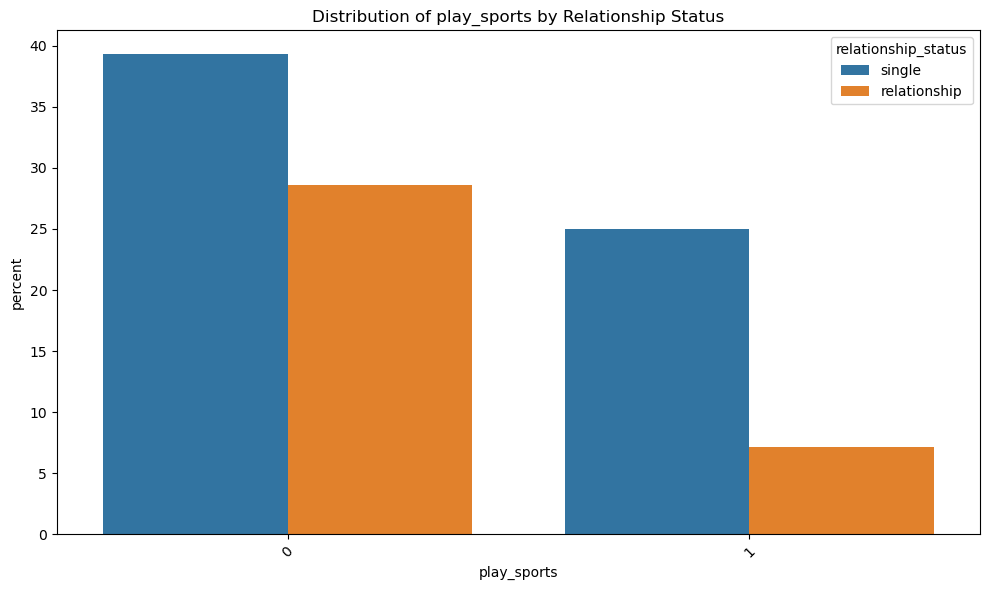

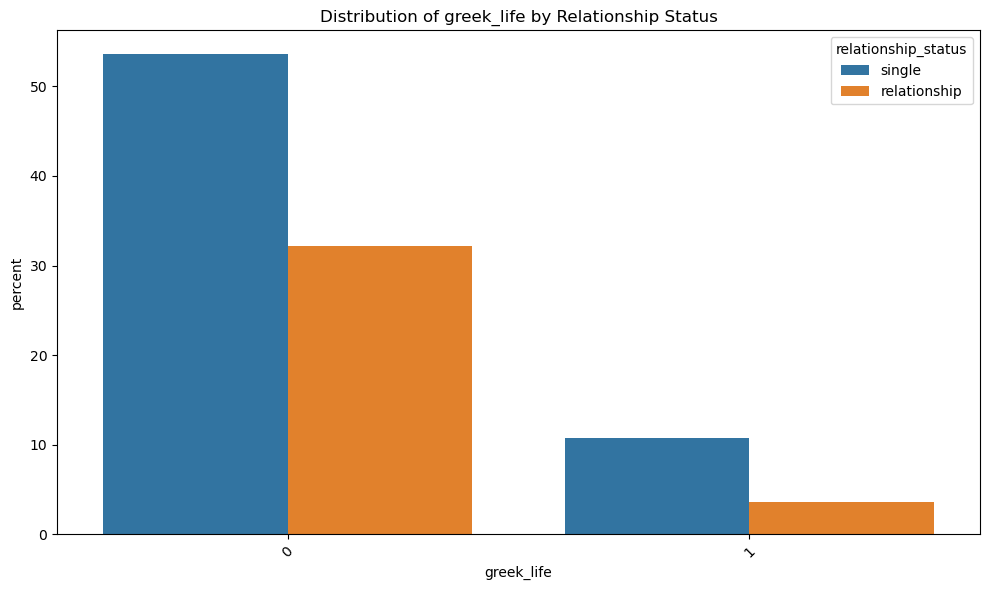

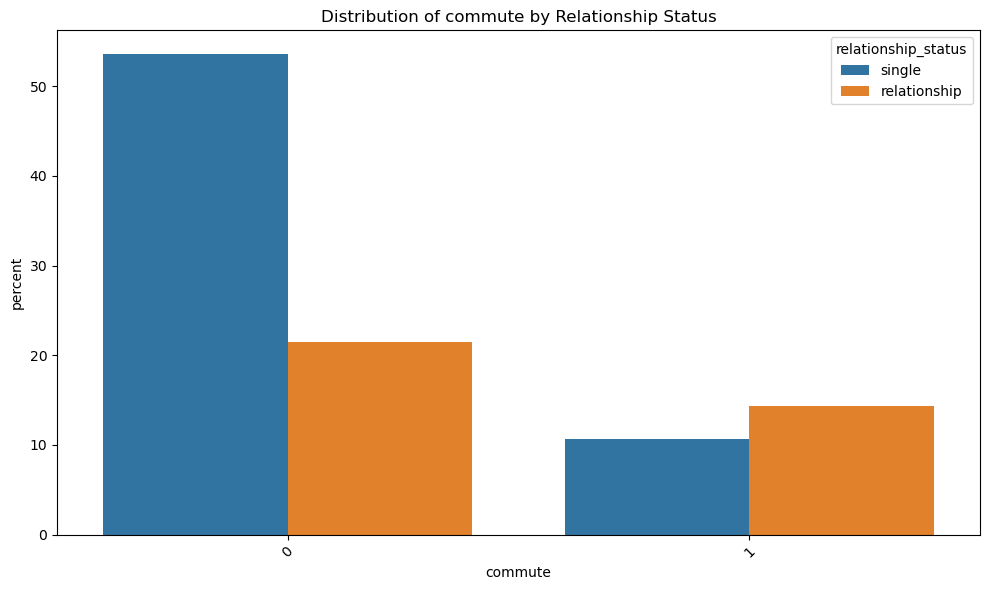

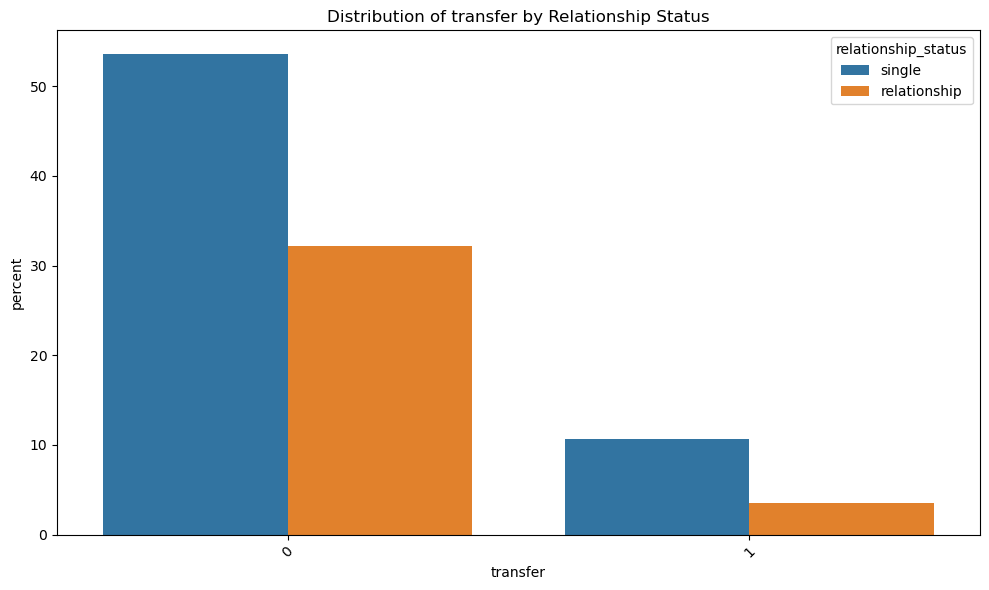

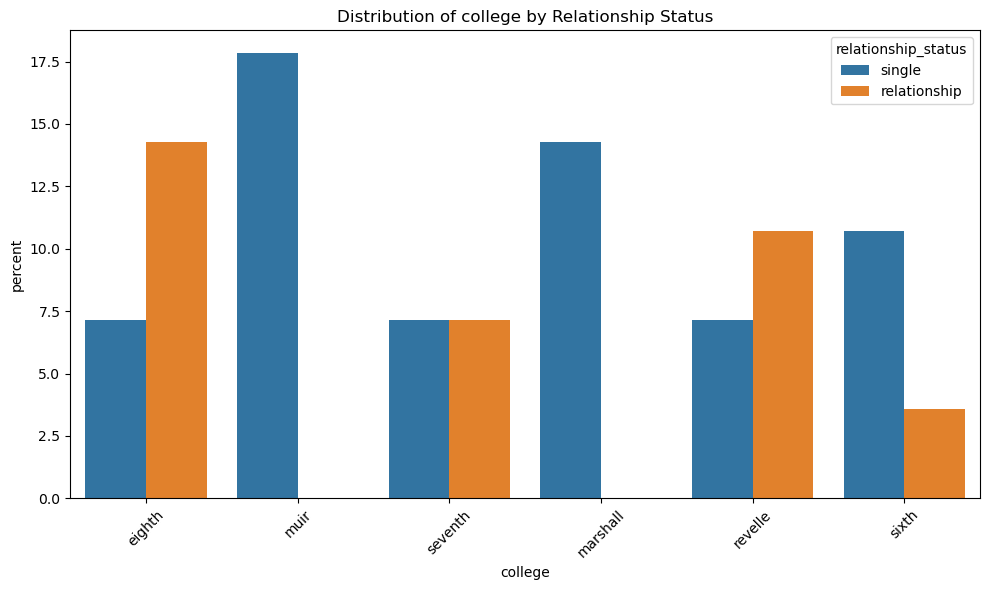

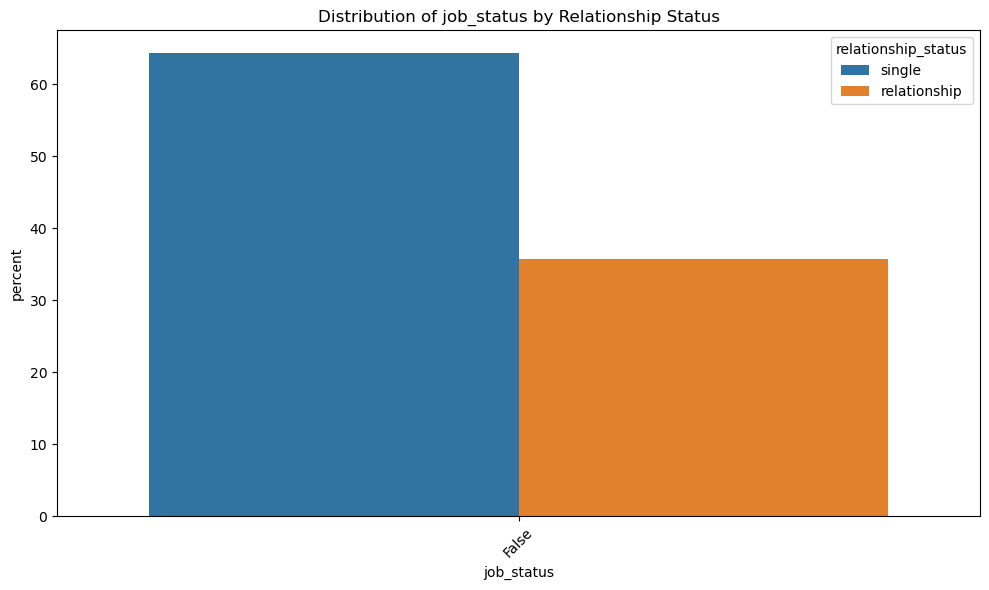

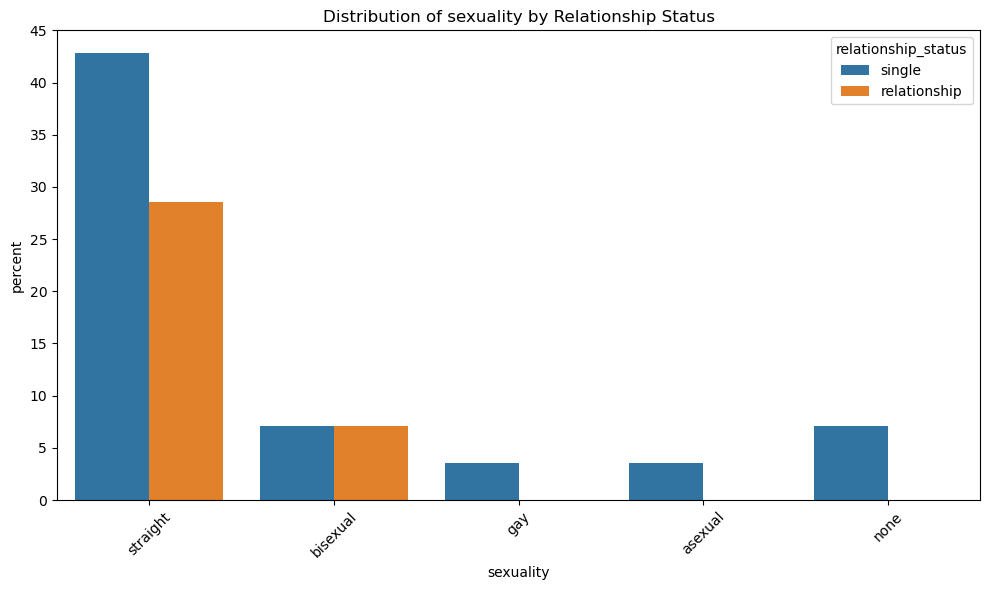

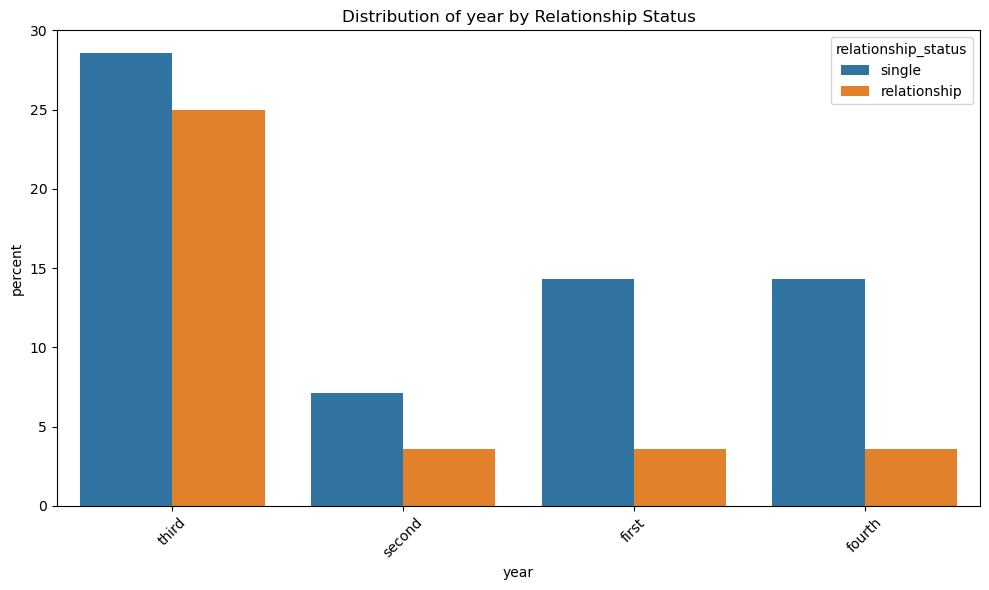

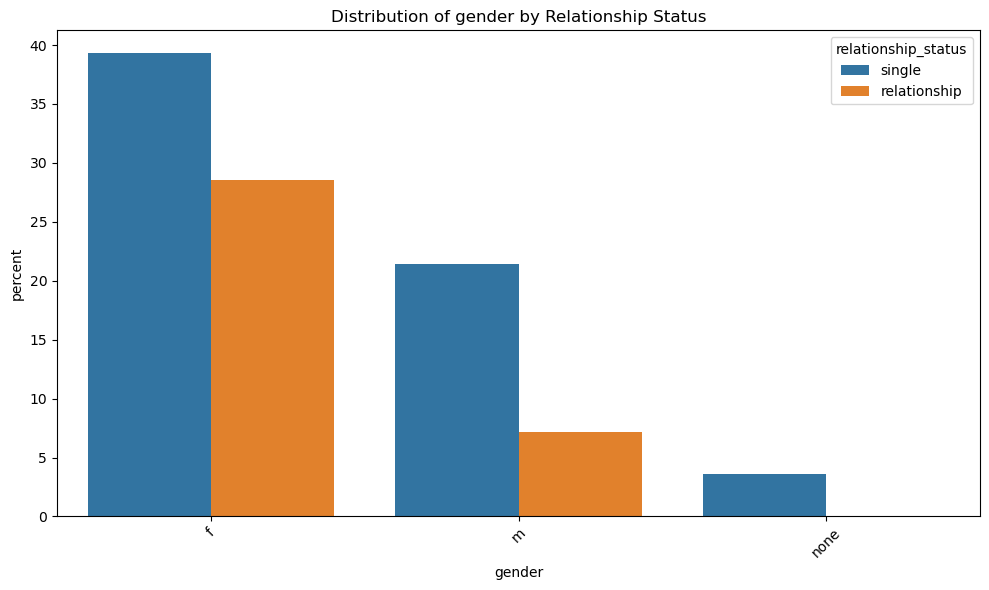

In [62]:
# Plot variables against relationship status as percentages
cols1 = ['play_sports', 'greek_life',
       'commute', 'transfer', 'college', 'job_status',
       'sexuality', 'year', 'gender']

for column in cols1:
    plt.figure(figsize=(10, 6))
    sns.countplot(data=cleaned_data, x=column, hue='relationship_status', stat='percent', dodge=True)
    plt.title(f'Distribution of {column} by Relationship Status')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

In [ ]:
target = 'relationship_status'

pvals = {}
for col in cols1:
    contingency = pd.crosstab(cleaned_data[target], cleaned_data[col])
    chi2, p, dof, expected = chi2_contingency(contingency)
    pvals[col] = p

pvals = pd.Series(pvals, name='p_value')
print(pvals.sort_values())

college        0.096116
commute        0.362380
gender         0.523728
play_sports    0.546363
year           0.600536
sexuality      0.602620
transfer       1.000000
greek_life     1.000000
job_status     1.000000
Name: p_value, dtype: float64


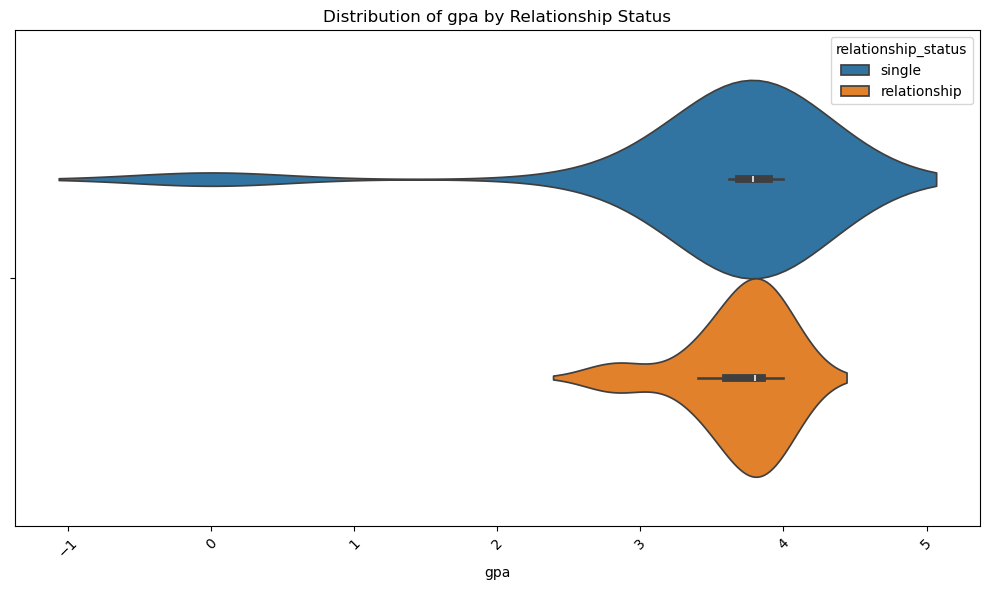

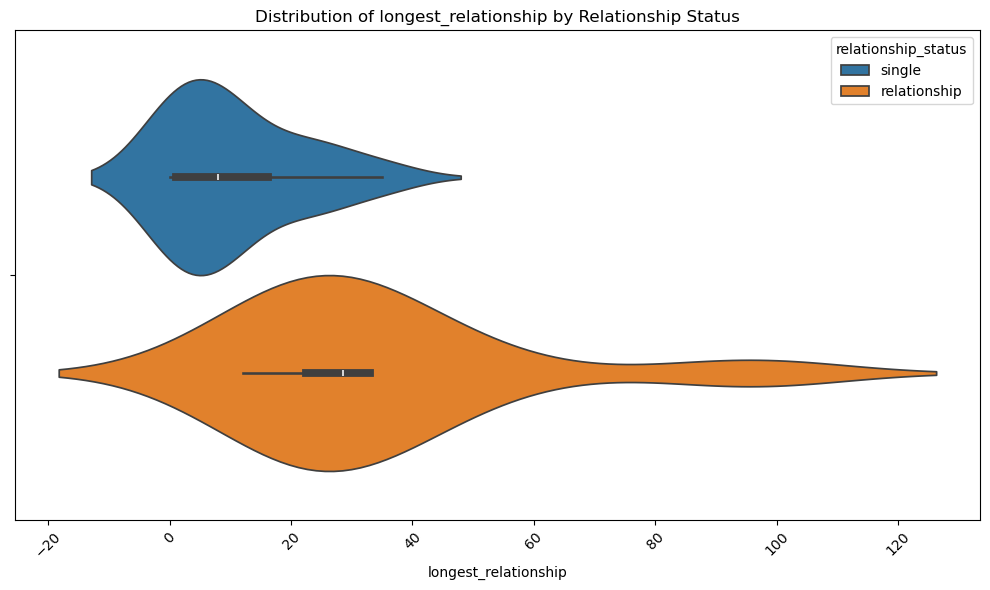

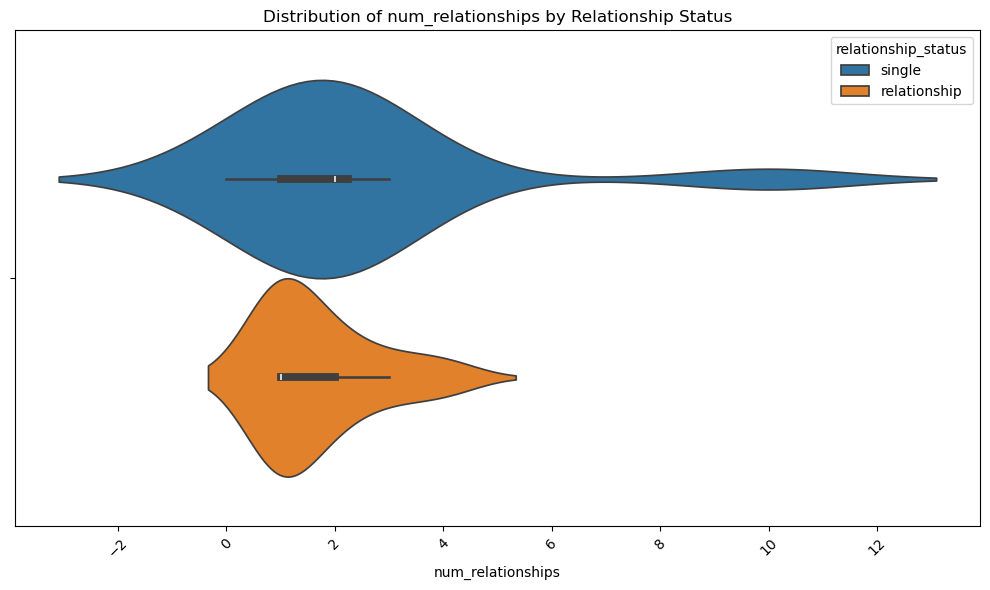

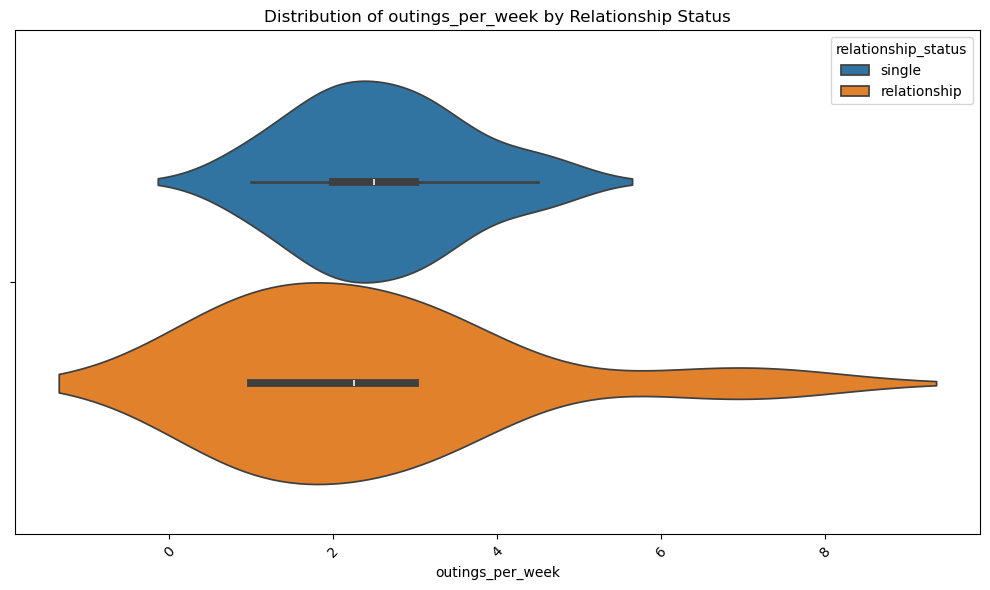

In [68]:
# Plot numeric variables against relationship status
cols2 = ['gpa', 'longest_relationship', 'num_relationships', 'outings_per_week']
for column in cols2:
    plt.figure(figsize=(10, 6))
    sns.violinplot(data=cleaned_data, x=column, hue='relationship_status')
    plt.title(f'Distribution of {column} by Relationship Status')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

In [70]:
# Run statistical tests for numeric variables against relationship status
for column in cols2:
    true_bins = cleaned_data[cleaned_data['relationship_status'] == 'relationship'][column].dropna()
    false_bins = cleaned_data[cleaned_data['relationship_status'] == 'single'][column].dropna()
    u_stat, p_value = mannwhitneyu(true_bins, false_bins, alternative='two-sided')
    print(f"Mann-Whitney U test for {column} against relationship_status (two-sided): U = {u_stat:.2f}, p = {p_value:.4f}")

Mann-Whitney U test for gpa against relationship_status (two-sided): U = 87.50, p = 0.9196
Mann-Whitney U test for longest_relationship against relationship_status (two-sided): U = 121.00, p = 0.0030
Mann-Whitney U test for num_relationships against relationship_status (two-sided): U = 49.00, p = 0.4651
Mann-Whitney U test for outings_per_week against relationship_status (two-sided): U = 72.50, p = 0.4057
